In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [243]:
df = pd.read_csv('/content/4. gurgaon_houses_and_flats_cleaned.csv', on_bad_lines = 'skip')

In [244]:
df.head()

,property_type,society,sector,price_in_cr,price_per_sqft,area_in_sqft,areawithtype,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,Maa Bhagwati Residency,Sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,...,NaN,NaN,900.0,0,0,0,0,0,0,28
1,flat,Apna Enclave,Sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,...,NaN,NaN,650.0,0,0,0,0,0,2,37
2,flat,Tulsiani Easy In Homes,Sohna Road,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,...,NaN,NaN,595.0,0,0,0,0,0,0,36
3,flat,Smart World Orchard,Sector 61,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,...,NaN,NaN,1200.0,1,0,0,0,0,0,76
4,flat,Parkwood Westend,Sector 92,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,...,1345.0,NaN,NaN,1,0,0,0,0,0,0


In [245]:
temp = df[df['society']!='Independent'].groupby('sector')['price_in_cr'].mean().reset_index()

fig = px.sunburst(temp,  path = [px.Constant('Gurgaon'), 'sector'], values = 'price_in_cr', color = 'price_in_cr',
                  color_continuous_scale = 'viridis', title='Gurgaon Flat Average Prices by Sector',
                  height = 800)
fig.show()


In [246]:
temp = df[(df['society']!='Independent') & (df['property_type'] == 'flat')]

fig = px.treemap(temp, path = [px.Constant('Gurgaon'), 'sector','society'], values = 'price_in_cr', color = 'price_in_cr', color_continuous_scale = 'Viridis',
                 title='Gurgaon Flats Prices by Sector & Society', height = 1000, width = 1500)
fig.show()


In [247]:
temp = df[(df['property_type'] == 'house')]

fig = px.treemap(temp, path = [px.Constant('Gurgaon'), 'sector','society'], values = 'price_in_cr', color = 'price_in_cr', color_continuous_scale = 'Viridis',
                 title='Gurgaon Houses Prices by Sector & Society')
fig.show()


# 1.Price vs property_type

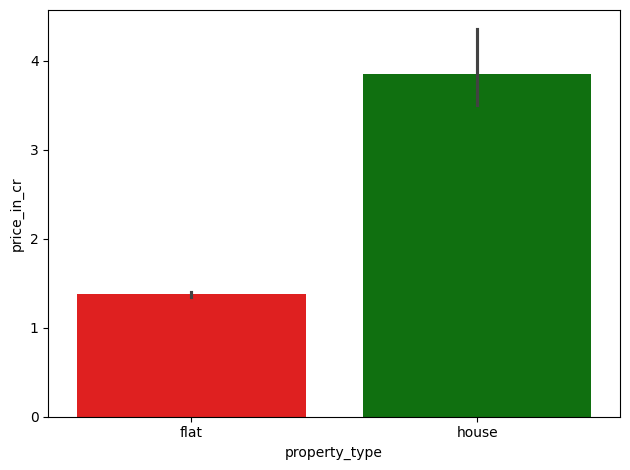

In [248]:
sns.barplot(x = df['property_type'], y = df['price_in_cr'], estimator = np.median, palette={'flat':'red','house':'green'})

plt.tight_layout()
plt.show()

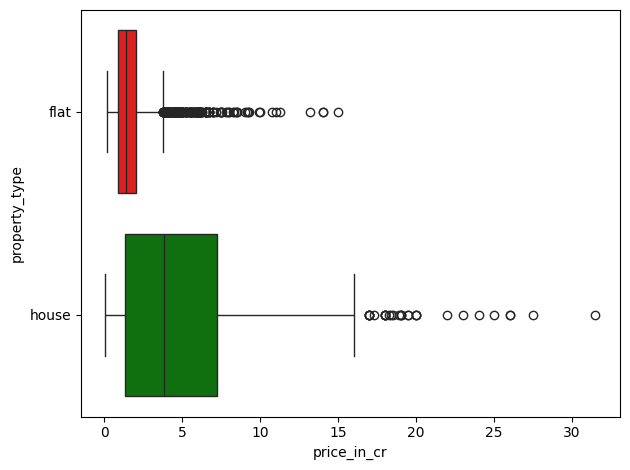

In [249]:
sns.boxplot(x = df['price_in_cr'], y = df['property_type'], palette={'flat':'red','house':'green'})

plt.tight_layout()
plt.show()

# 2.property_type vs price_per_sqft

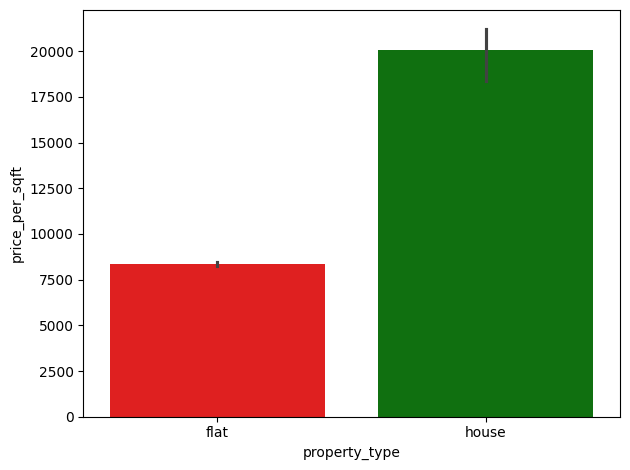

In [250]:
sns.barplot(x = df['property_type'], y = df['price_per_sqft'], palette = {'flat':'red','house':'green'}, estimator = np.median)

plt.tight_layout()
plt.show()

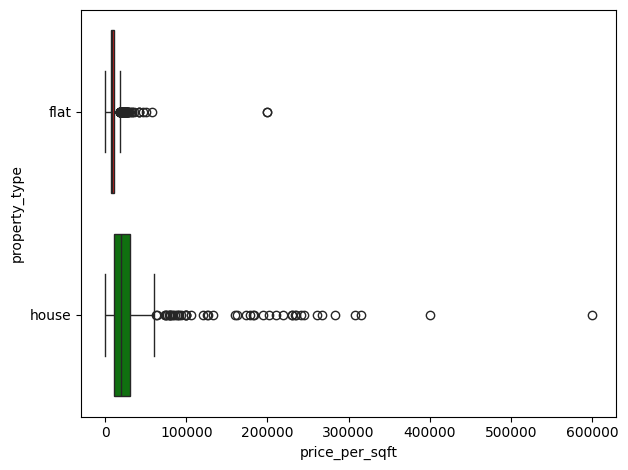

In [251]:
sns.boxplot(x = df['price_per_sqft'], y = df['property_type'], palette = {'flat':'red','house':'green'})

plt.tight_layout()
plt.show()

In [252]:
df[df['price_per_sqft']>90000].shape

# data error in area_in_sq_ft that's why price_per_sqft shoots up

(36, 24)

# 3.property_type vs area_in_sq_ft

# 4.property_type vs built_up_area

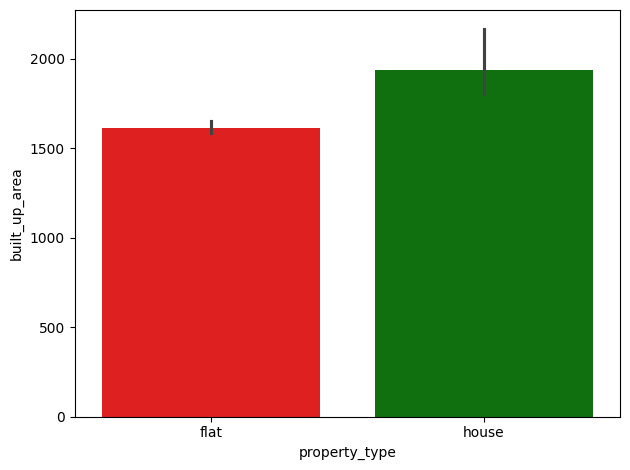

In [253]:
sns.barplot(x = df['property_type'], y = df['built_up_area'], estimator = np.median, palette = {'flat':'red','house':'green'})

plt.tight_layout()
plt.show()

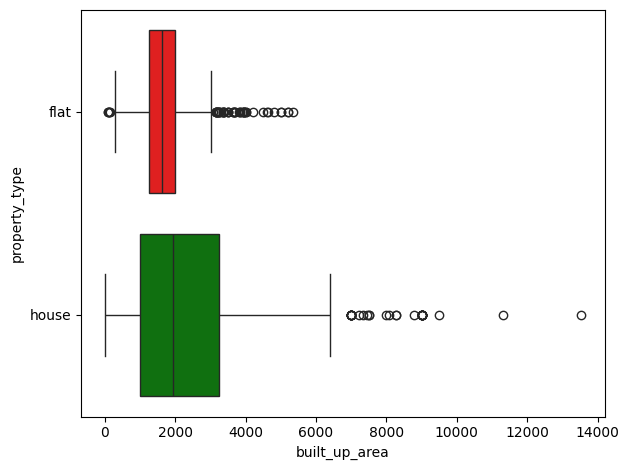

In [254]:
temp = df[df['built_up_area'] != df['built_up_area'].max()]

sns.boxplot(x = temp['built_up_area'], y = temp['property_type'], palette = {'flat':'red','house':'green'})

plt.tight_layout()
plt.show()

# 5.property_type vs bedroom

In [255]:
pd.crosstab(df['property_type'], df['bedroom'])

bedroom,1,2,3,4,5,6,7,8,9,10,...,12,13,14,16,18,19,20,21,34,36
property_type,,,,,,,,,,,,,,,,,,,,,
flat,104,930,1424,474,30,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
house,30,72,142,213,171,76,29,31,40,20,...,26,4,1,10,2,2,1,1,1,1


In [256]:
fig = px.imshow(pd.crosstab(df['property_type'], df['bedroom']), text_auto = True)

fig.update_layout(title = 'Property Type vs Number of Bedrooms Distribution', yaxis_title = 'Property Type')
fig.show()

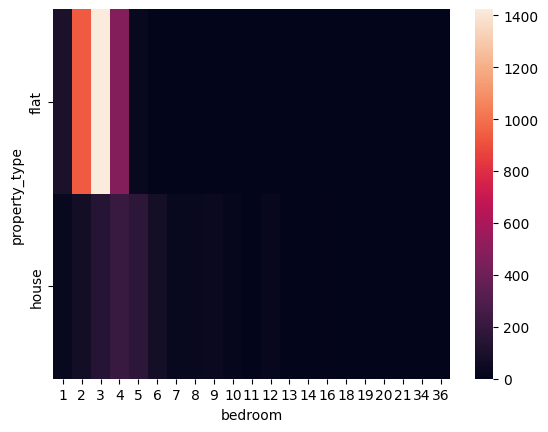

In [257]:
sns.heatmap(pd.crosstab(df['property_type'], df['bedroom']))

plt.show()

In [258]:
df[df['bedroom']>8] # outliers

,property_type,society,sector,price_in_cr,price_per_sqft,area_in_sqft,areawithtype,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2966,house,Independent,Sector 43,2.10,38251.0,NaN,Plot area 61(51 sq.m.),10,10,3+,...,NaN,550.1224,NaN,0,1,0,0,0,0,20
2967,house,Independent,Sector 54,5.00,43066.0,NaN,Plot area 129(107.86 sq.m.),21,21,3+,...,NaN,1163.3736,NaN,0,1,0,0,0,1,49
2968,house,Independent,Sector 43,3.00,53763.0,NaN,Plot area 62(51.84 sq.m.),12,12,3+,...,NaN,559.1408,NaN,0,0,0,0,1,1,20
2969,house,Independent,Sector 43,4.50,39062.0,NaN,Plot area 128(107.02 sq.m.),20,20,3+,...,NaN,1154.3552,NaN,0,1,0,0,0,1,22
2971,house,Luxury DLF City Floors,Sector 26,20.00,48889.0,NaN,Plot area 500(418.06 sq.m.),16,16,3+,...,NaN,4509.2000,NaN,0,1,0,0,0,2,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3816,house,DLF City,Sector 26,9.25,47803.0,NaN,Plot area 1935(179.77 sq.m.)Built Up area: 700...,12,12,NaN,...,NaN,7000.0000,NaN,0,1,0,1,0,2,43
3818,house,Independent,Sector 47,6.09,33665.0,NaN,Plot area 201(168.06 sq.m.)Built Up area: 180 ...,12,11,NaN,...,NaN,180.0000,150.0,0,0,0,1,0,1,44
3819,house,Independent,Sector 55,5.00,44444.0,NaN,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,NaN,...,NaN,115.0000,100.0,0,0,0,0,1,2,44
3821,house,Huda Floor,Sector 38,4.00,22222.0,NaN,Plot area 1800(167.23 sq.m.)Built Up area: 480...,9,9,NaN,...,NaN,4800.0000,3800.0,0,0,1,1,0,2,152


In [259]:
df[df['bedroom'] > 8]['property_type'].value_counts() # ouliers in bedroom are all houses

,count
property_type,
house,110


# 6.property_type vs floornum

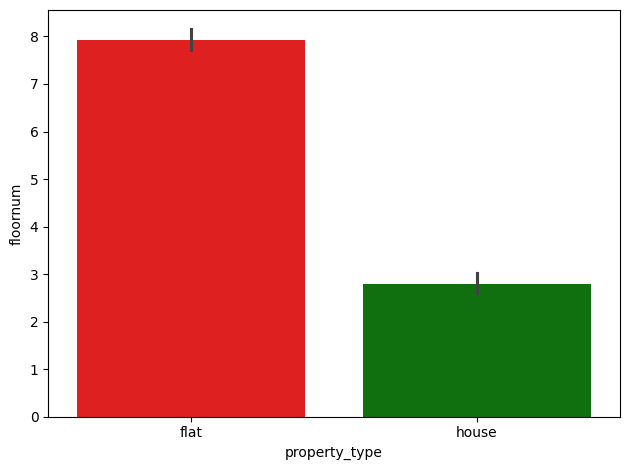

In [260]:
sns.barplot(x = df['property_type'], y = df['floornum'], palette = {'flat':'red','house':'green'})

plt.tight_layout()
plt.show()

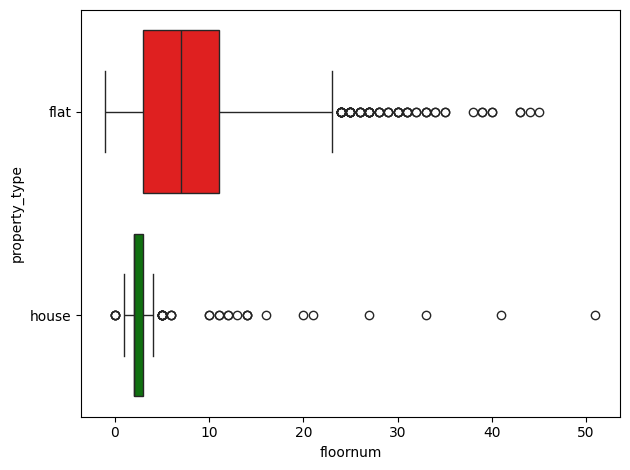

In [261]:
sns.boxplot(x = df['floornum'], y = df['property_type'], palette = {'flat':'red','house':'green'})

plt.tight_layout()
plt.show()

In [262]:
# checking for outliers

df[(df['property_type'] == 'house') & (df['floornum'] > 10)]

# conclusion houses(villa) but in appartments


,property_type,society,sector,price_in_cr,price_per_sqft,area_in_sqft,areawithtype,bedroom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3116,house,Ninex City,Sector 76,1.75,6250.0,NaN,Carpet area: 2800 (260.13 sq.m.),4,4,NaN,...,NaN,NaN,2800.0,0,0,0,0,0,0,0
3117,house,Spaze Privy,Sector 72,3.10,8486.0,NaN,Plot area 3653(339.37 sq.m.),5,5,NaN,...,NaN,3653.00,NaN,0,0,0,0,0,0,0
3144,house,ATS Tourmaline,Sector 109,1.87,8697.0,NaN,Built Up area: 2150 (199.74 sq.m.),3,4,NaN,...,NaN,2150.00,NaN,0,0,0,0,0,0,0
3166,house,DLF The Arbour,Sector 63,8.50,21519.0,NaN,Built Up area: 3950 (366.97 sq.m.),4,4,NaN,...,NaN,3950.00,NaN,0,0,0,0,0,0,61
3196,house,Independent,Sector 92,1.80,7627.0,NaN,Built Up area: 2360 (219.25 sq.m.),4,5,NaN,...,NaN,2360.00,NaN,0,0,0,0,0,0,0
3310,house,Indiabulls Centrum Park,Sector 103,3.25,8125.0,NaN,Plot area 4000(371.61 sq.m.),4,3,NaN,...,NaN,4000.00,NaN,0,0,0,0,0,0,51
3369,house,Greenopolis,Sector 89,0.70,5397.0,NaN,Built Up area: 1297 (120.5 sq.m.),2,2,NaN,...,NaN,1297.00,NaN,0,0,0,0,0,0,0
3375,house,Spaze Privy,Sector 72,3.09,6981.0,NaN,Built Up area: 3653 (339.37 sq.m.)Carpet area:...,5,5,NaN,...,NaN,3653.00,2922.0,0,1,0,0,0,2,33
3376,house,Satya The Hermitage,Sector 103,3.15,6702.0,NaN,Built Up area: 4700 (436.64 sq.m.),4,5,NaN,...,NaN,4700.00,NaN,0,0,0,0,0,0,61
3409,house,Suncity Avenue,Sector 76,0.75,10067.0,NaN,Plot area 745(69.21 sq.m.)Built Up area: 745 s...,2,2,NaN,...,NaN,745.00,NaN,0,0,0,0,0,0,40


# 7.property_type vs furnishing_type

In [263]:
crosstab = pd.crosstab(df['property_type'], df['furnishing_type'])
crosstab

furnishing_type,0,1,2
property_type,,,
flat,2049,152,764
house,513,57,304


In [264]:
fig = px.imshow(crosstab, text_auto = True, color_continuous_scale = 'viridis', width = 700)

fig.update_layout(title='Property Type vs Furnishing Type Distribution', xaxis_title = 'Furnishing Type', yaxis_title = 'Property Type')

fig.show()

# 8.property_type vs furnishing_type vs price

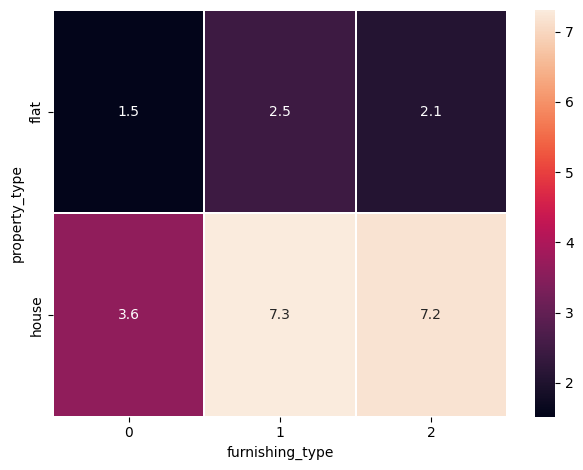

In [265]:
sns.heatmap(pd.pivot_table(df,index='property_type', columns='furnishing_type', values='price_in_cr', aggfunc='mean'), annot=True, linewidths = 0.1)

plt.tight_layout()
plt.show()


# 9.property_type vs agepossession

In [266]:
crosstab = pd.crosstab(df['property_type'], df['agepossession'])
crosstab

agepossession,Moderately Old,New Property,Old,Relatively New,Undefined,Under Construction
property_type,,,,,,
flat,354,665,130,1472,301,43
house,228,118,187,206,135,0


In [267]:
fig = px.imshow(crosstab, text_auto = True, width = 800, height = 500, color_continuous_scale = 'viridis')

fig.update_layout(title='Property Type vs Age Possession Distribution', xaxis_title = 'Property Type', yaxis_title = 'Property Type')

fig.show()


# 10.property_type vs agepossession vs price

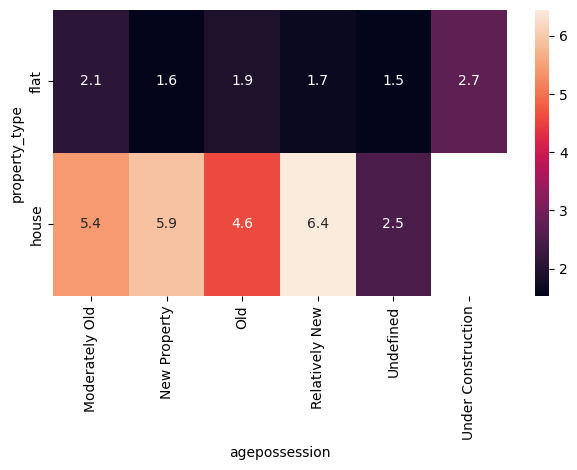

In [268]:
sns.heatmap(pd.pivot_table(df, index = 'property_type', columns = 'agepossession', values = 'price_in_cr', aggfunc = 'mean'), annot = True)

plt.tight_layout()
plt.show()

# 11.property_type vs bedroom vs price

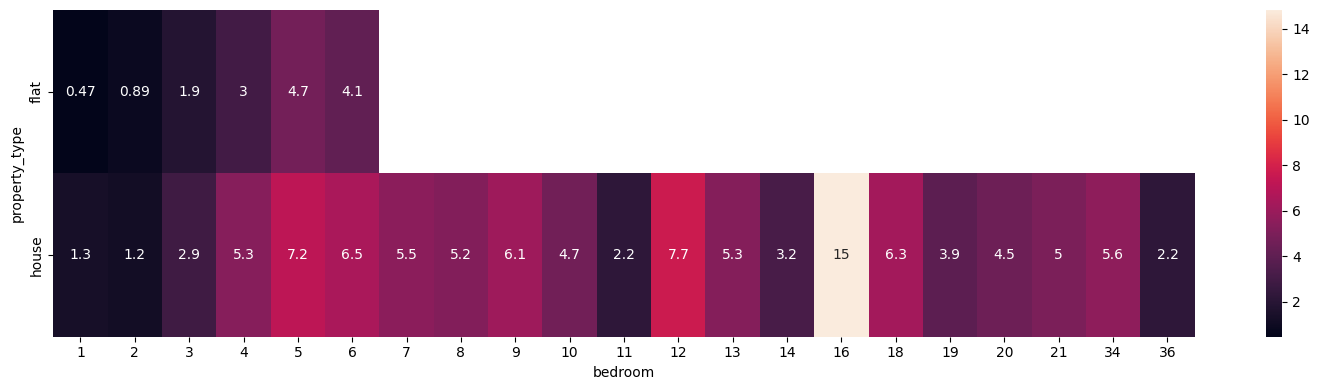

In [269]:
plt.figure(figsize=(15,4))

sns.heatmap(pd.pivot_table(df,index='property_type', columns='bedroom', values='price_in_cr', aggfunc='mean'),annot=True)

plt.tight_layout()
plt.show()

# 12.property_type vs luxury_score

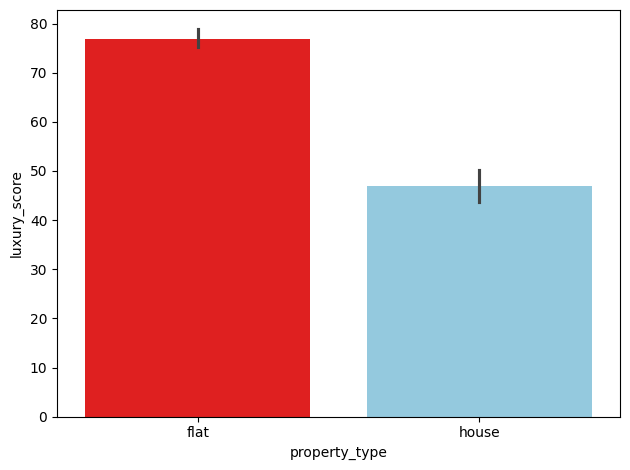

In [270]:
sns.barplot(x = df['property_type'], y = df['luxury_score'], palette={'flat':'red','house':'skyblue'})

plt.tight_layout()
plt.show()

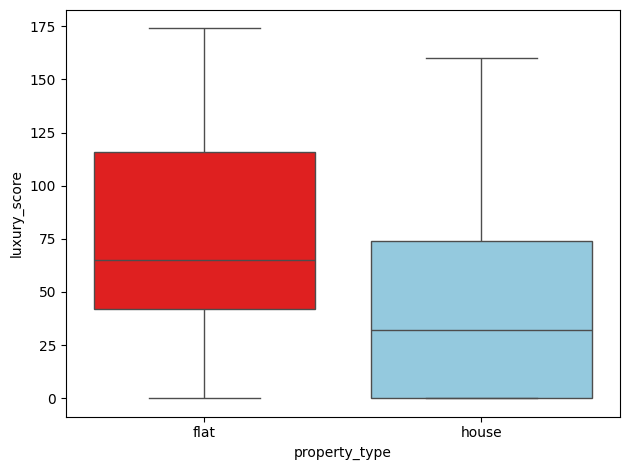

In [271]:
sns.boxplot(x = df['property_type'], y = df['luxury_score'], palette={'flat':'red','house':'skyblue'})

plt.tight_layout()
plt.show()

# 13.property_type vs sector

In [272]:
df.columns

Index(['property_type', 'society', 'sector', 'price_in_cr', 'price_per_sqft',
       'area_in_sqft', 'areawithtype', 'bedroom', 'bathroom', 'balcony',
       'floornum', 'facing', 'agepossession', 'area_in_sq_ft',
       'super_built_up_area', 'built_up_area', 'carpet_area', 'study room',
       'servant room', 'store room', 'pooja room', 'others', 'furnishing_type',
       'luxury_score'],
      dtype='object')

In [273]:
crosstab = pd.crosstab(df['property_type'], df['sector'])
crosstab

sector,Acharya Puri,Ambience Island,Bissar,Block A Sector 21,Daulatabad,Dwarka Expressway,Faridabad Road,Farukhnagar,Golf Course Ext Road,Golf Course Road,...,Sector 9A,Shankar Vihar,Shanti Nagar,Sheetla Colony,Sispal Vihar,Sohna Road,Surat Nagar,Surat Nagar Phase 2,Sushant Lok,West Sector 13
property_type,,,,,,,,,,,,,,,,,,,,,
flat,0,2,0,2,0,7,1,0,2,1,...,10,2,2,0,2,162,0,0,2,0
house,2,0,2,0,2,1,1,2,0,1,...,1,0,0,2,0,15,2,2,0,2


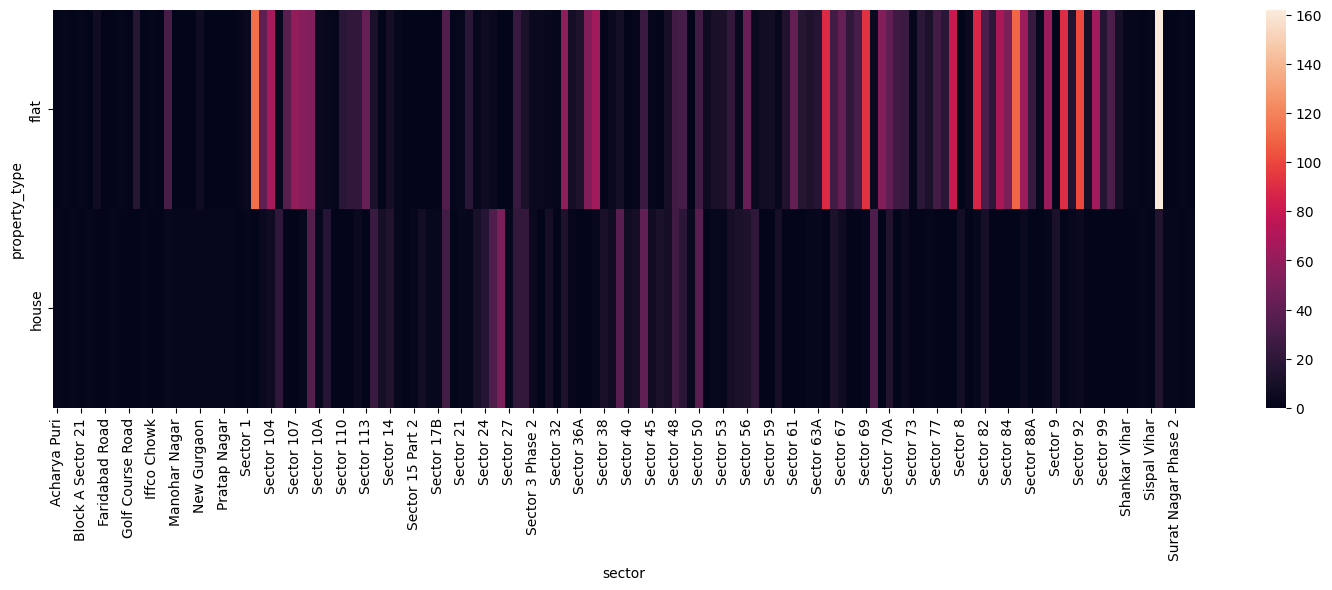

In [274]:
plt.figure(figsize=(15,6))
sns.heatmap(crosstab)
plt.tight_layout()
plt.show()

# more flats are being constructed in New Sectors
# old sectors have more houses than flats

# 14.Price Vs Sector

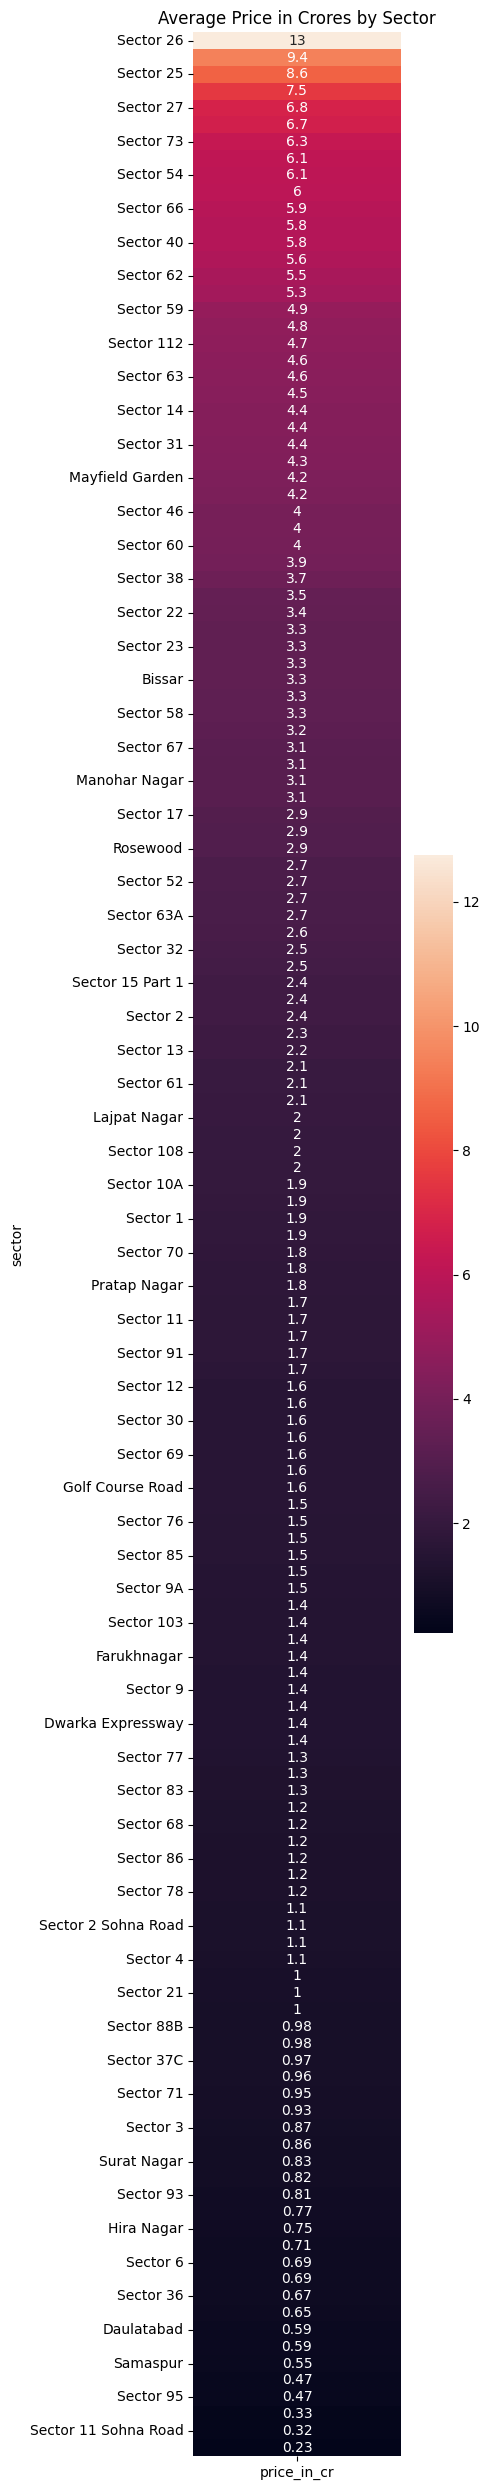

In [275]:
matrix = pd.pivot_table(df, index = 'sector', values = 'price_in_cr', aggfunc = 'mean')

matrix.sort_values(by = 'price_in_cr', ascending = False, inplace = True)

plt.figure(figsize=(5, 25))
sns.heatmap(matrix, annot=True)

plt.title('Average Price in Crores by Sector')
plt.tight_layout()
plt.show()


# 15.sector vs price_per_sqft

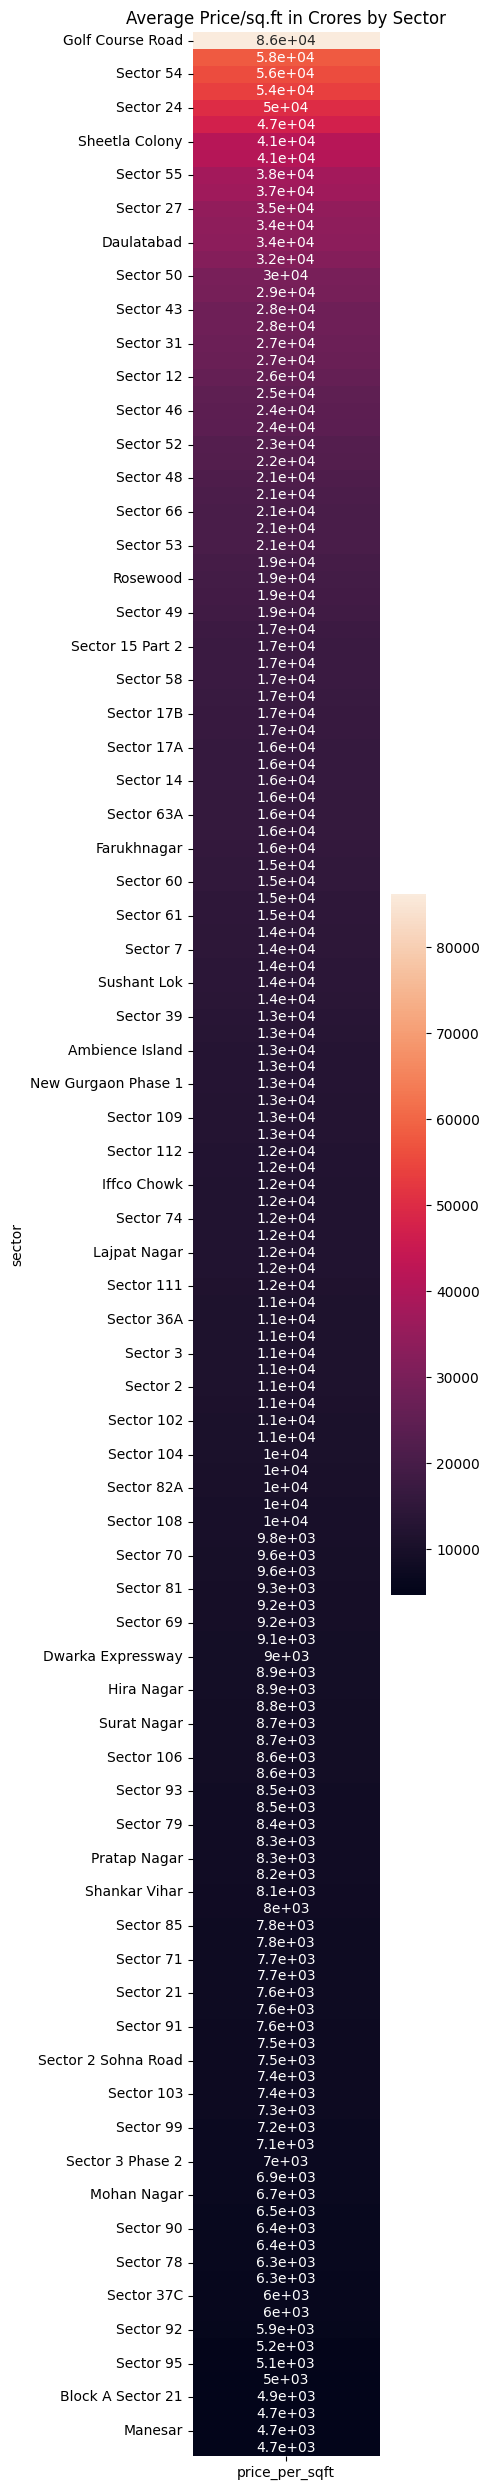

In [276]:
matrix = pd.pivot_table(df, index = 'sector', values = 'price_per_sqft', aggfunc = 'mean')

matrix.sort_values(by = 'price_per_sqft', ascending = False, inplace = True)

plt.figure(figsize=(5, 25))
sns.heatmap(matrix, annot=True)
plt.title('Average Price/sq.ft in Crores by Sector')
plt.tight_layout()
plt.show()


# 16.sector vs luxuy_score

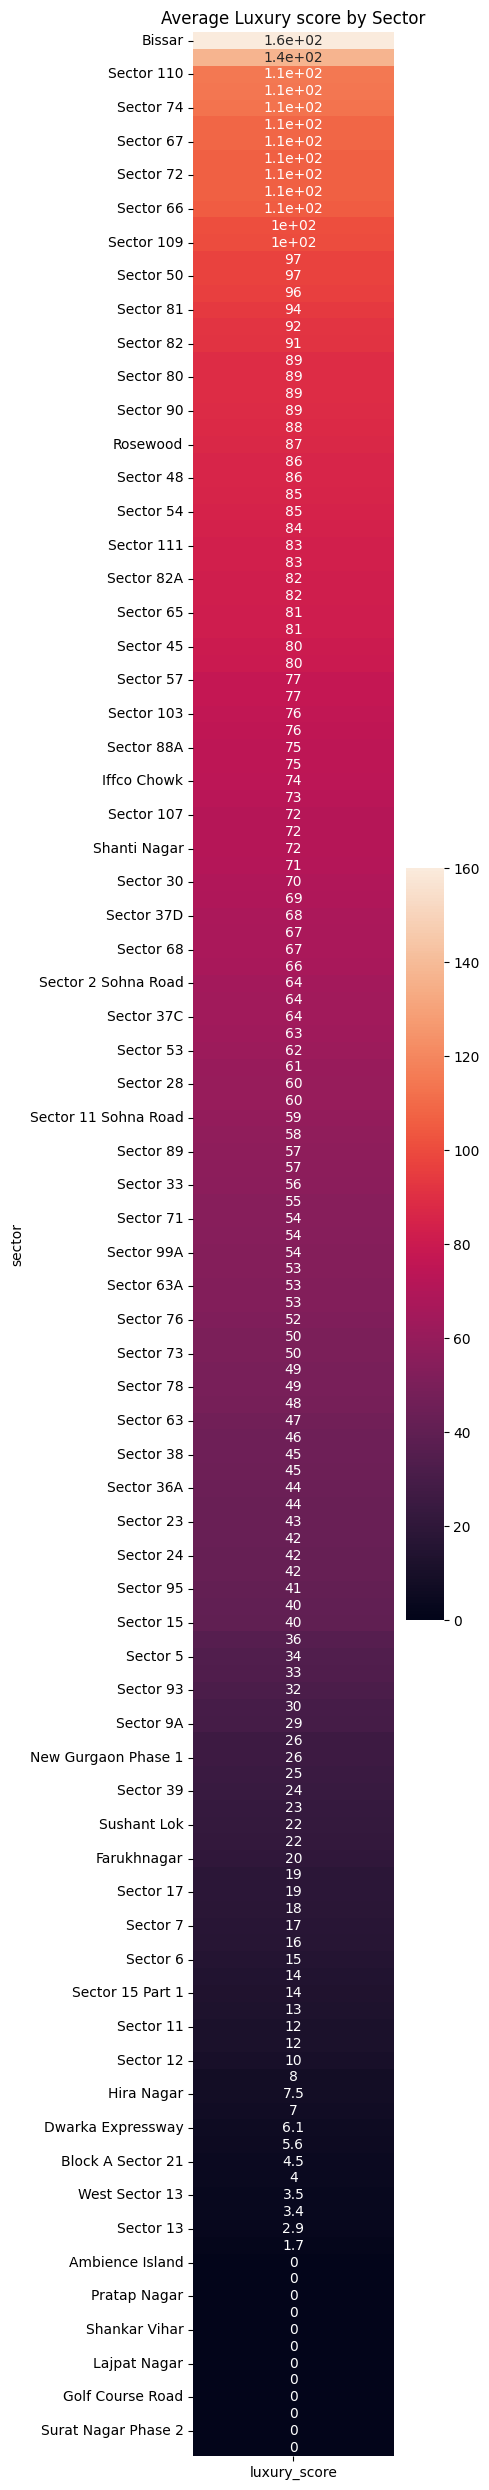

In [277]:
matrix = pd.pivot_table(df, index = 'sector', values = 'luxury_score', aggfunc = 'mean')

matrix.sort_values(by = 'luxury_score', ascending = False, inplace = True)

plt.figure(figsize=(5, 25))
sns.heatmap(matrix, annot=True)
plt.title('Average Luxury score by Sector')
plt.tight_layout()
plt.show()


# 17.Area in Sqft Vs Price Vs Bedroom

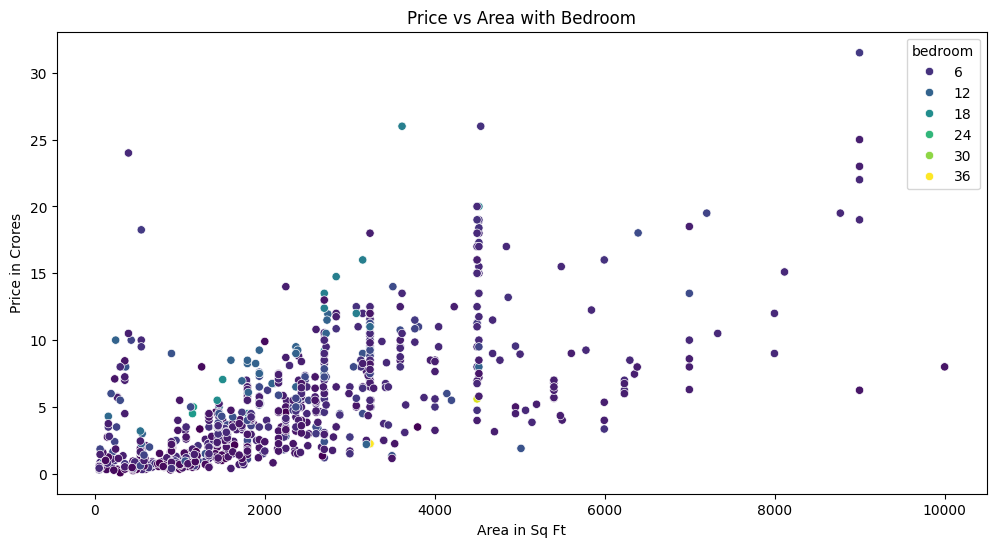

In [278]:
plt.figure(figsize=(12,6))

x = df[df['area_in_sq_ft']<10000]['area_in_sq_ft']

sns.scatterplot(x = x, y = df['price_in_cr'], hue=df['bedroom'], palette="viridis")

plt.title('Price vs Area with Bedroom')
plt.xlabel('Area in Sq Ft')
plt.ylabel('Price in Crores')
plt.show()

# 18.Area in Sqft Vs Price Vs agepossession

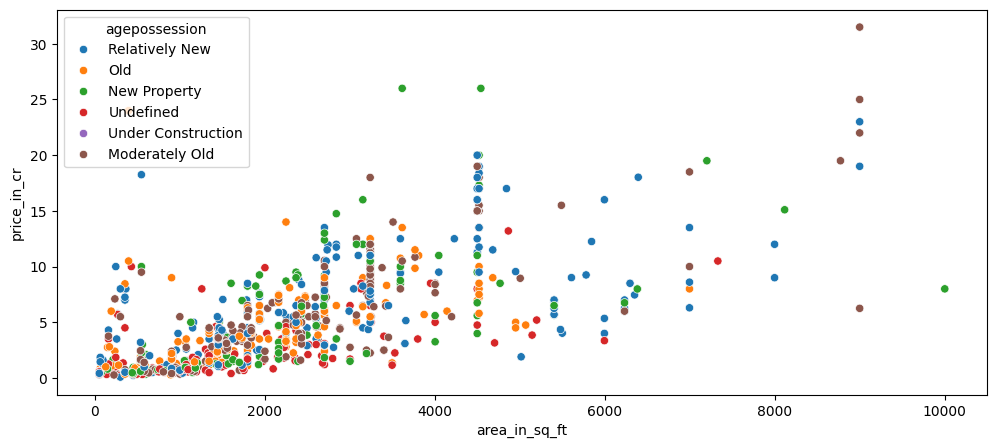

In [279]:
plt.figure(figsize=(12,5))

x = df[df['area_in_sq_ft']<10000]['area_in_sq_ft']

sns.scatterplot(x = x, y = df['price_in_cr'], hue =df['agepossession'] )
plt.show()

# 19.Area in Sqft Vs Price Vs Furnishing Type

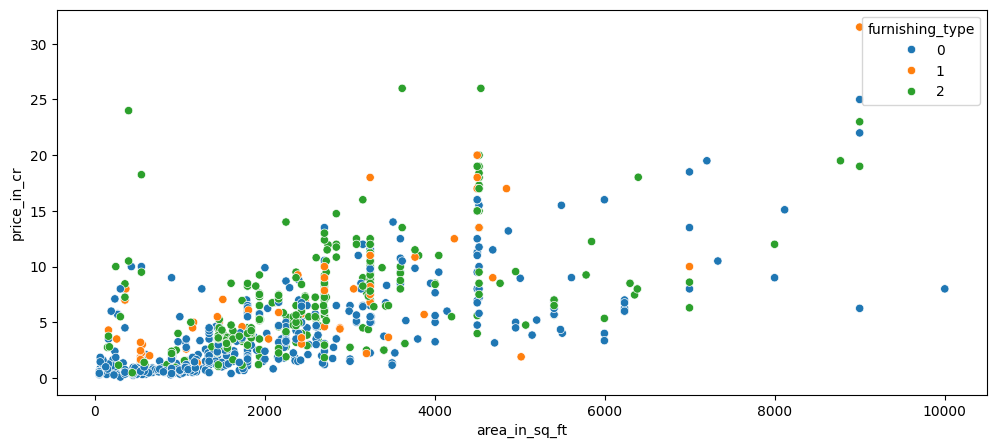

In [280]:
plt.figure(figsize=(12,5))

x = df[df['area_in_sq_ft']<10000]['area_in_sq_ft']

sns.scatterplot(x = x, y = df['price_in_cr'], hue=df['furnishing_type'].astype('category'))

plt.show()


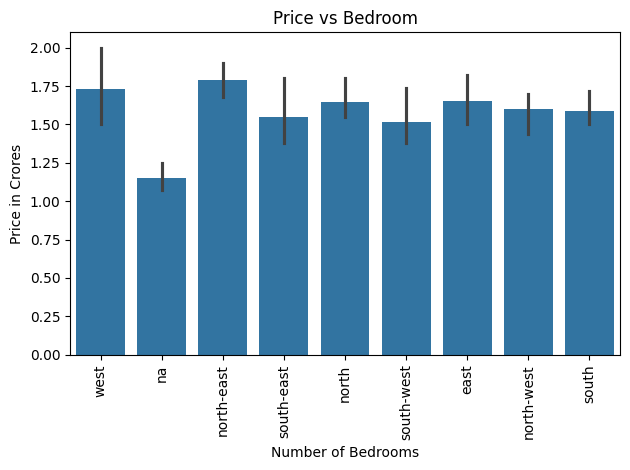

In [281]:
sns.barplot(x = df['facing'], y = df['price_in_cr'], estimator = np.median)

plt.title('Price vs Bedroom')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Crores')

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

# 20.Price vs Bedroom

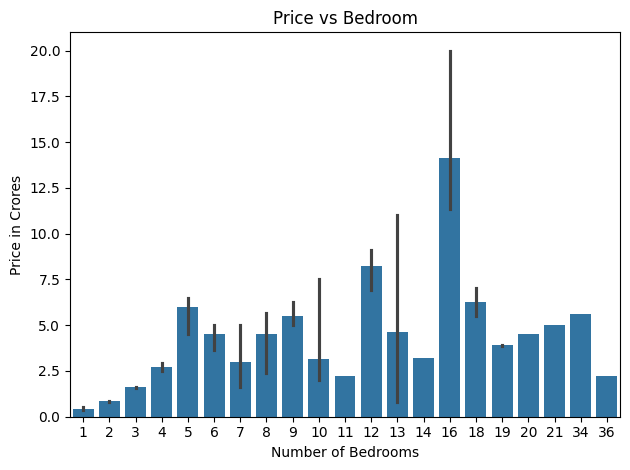

In [282]:
sns.barplot(x = df['bedroom'], y = df['price_in_cr'], estimator = np.median)

plt.title('Price vs Bedroom')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Crores')

plt.tight_layout()
plt.show()


# 21.Price vs Bathroom

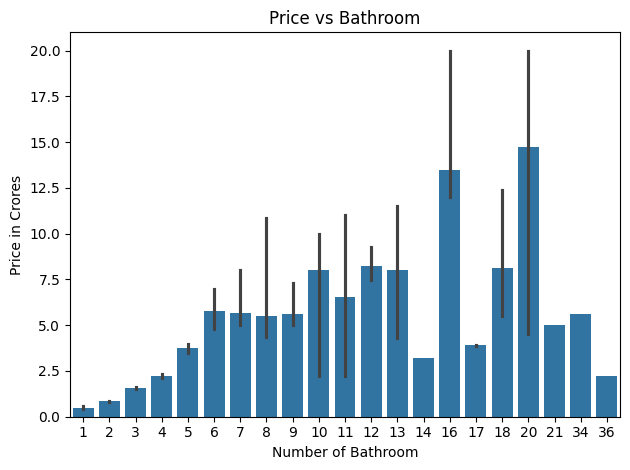

In [283]:
sns.barplot(x = df['bathroom'], y = df['price_in_cr'], estimator = np.median)

plt.title('Price vs Bathroom')
plt.xlabel('Number of Bathroom')
plt.ylabel('Price in Crores')

plt.tight_layout()
plt.show()

# 22.Price vs Balcony

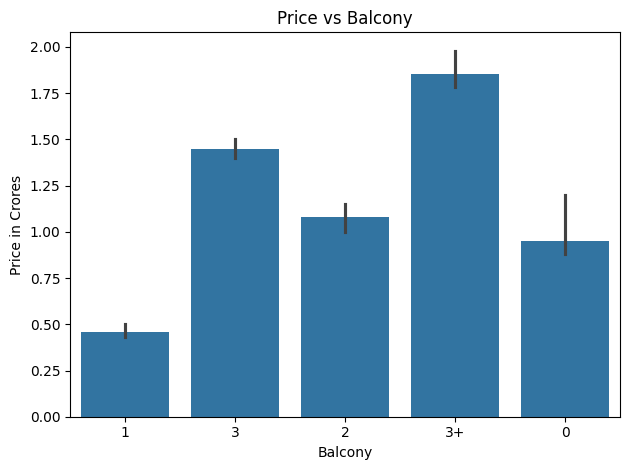

In [284]:
sns.barplot(x = df['balcony'], y = df['price_in_cr'], estimator = np.median)

plt.title('Price vs Balcony')
plt.xlabel('Balcony')
plt.ylabel('Price in Crores')

plt.tight_layout()
plt.show()

# 23.Price Vs Age possession Vs built_up_area

In [285]:
temp = df[df['agepossession'] != 'Undefined'].groupby('agepossession').agg({'built_up_area':'mean','price_in_cr':'mean'}).round(2).sort_values(by = 'price_in_cr', ascending = True).reset_index()
temp.rename(columns = {'agepossession': 'Age Possession', 'built_up_area' : 'Built-Up Area', 'price_in_cr': 'Average Price(In Crores)'}, inplace = True)
temp['Built-Up Area'] = temp['Built-Up Area'].astype(int)

fig = px.bar(temp, x = 'Age Possession', y = 'Average Price(In Crores)', width = 800, color = 'Built-Up Area', hover_name = 'Built-Up Area', text_auto = True)
fig.update_layout(title = 'Average Price (In Crores) vs Age Possession with Built Up Area')
fig.show()


In [286]:
df.groupby('agepossession').agg({'price_in_cr':'mean','area_in_sq_ft':'mean'})

,price_in_cr,area_in_sq_ft
agepossession,,
Moderately Old,3.402491,2280.860968
New Property,2.221239,4499.766297
Old,3.488486,2426.367255
Relatively New,2.257688,2993.827254
Undefined,1.831124,2143.052624
Under Construction,2.738372,NaN


In [287]:
df[df['agepossession'] == 'Old']['area_in_sq_ft'].median()

1797.5712999999998

In [288]:
df[df['agepossession'] == 'New Property']['area_in_sq_ft'].median()

2308.85655

# 24.Price Vs Furnishing Type

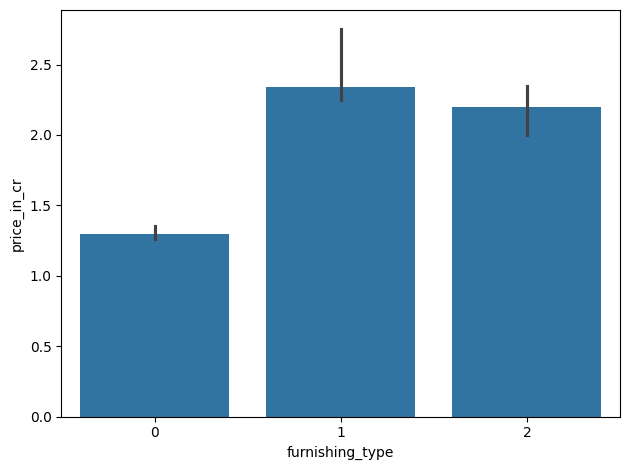

In [289]:
sns.barplot(x = df['furnishing_type'], y = df['price_in_cr'], estimator=np.median)

plt.tight_layout()
plt.show()
plt.show()


# 25.Price vs Luxury score

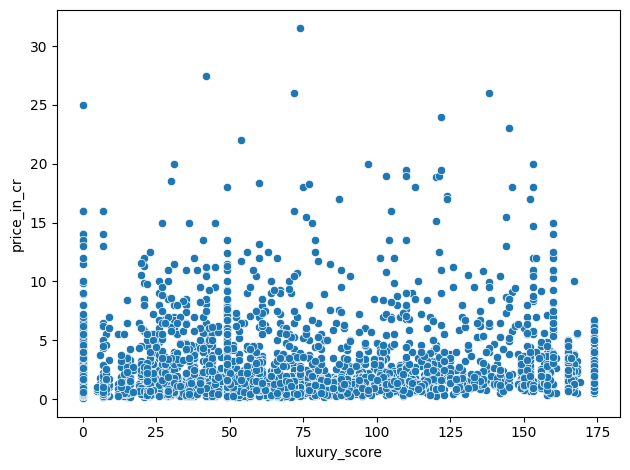

In [290]:
sns.scatterplot(x = df['luxury_score'], y = df['price_in_cr'])

plt.tight_layout()
plt.show()

# 26.Price vs price_per_sqft

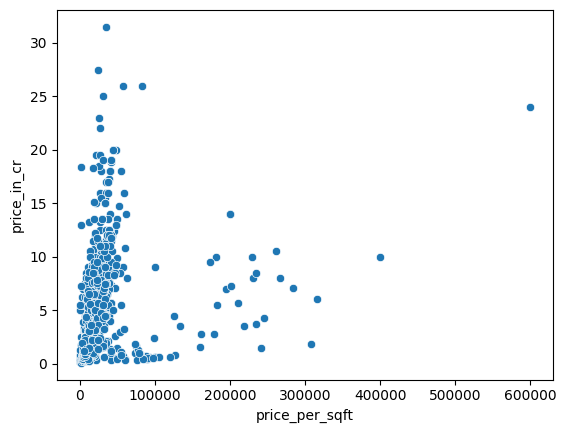

In [291]:
sns.scatterplot(x = df['price_per_sqft'], y = df['price_in_cr'])
plt.show()

# Data Errors are present in price_per_sqft, as price_per_sqft increases but price_in_cr is not increasing

# 27.Price vs Super Built up area

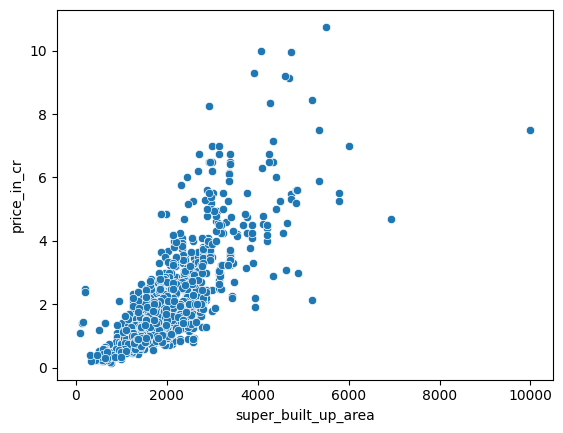

In [292]:
sns.scatterplot(x = df['super_built_up_area'], y = df['price_in_cr'])
plt.show()

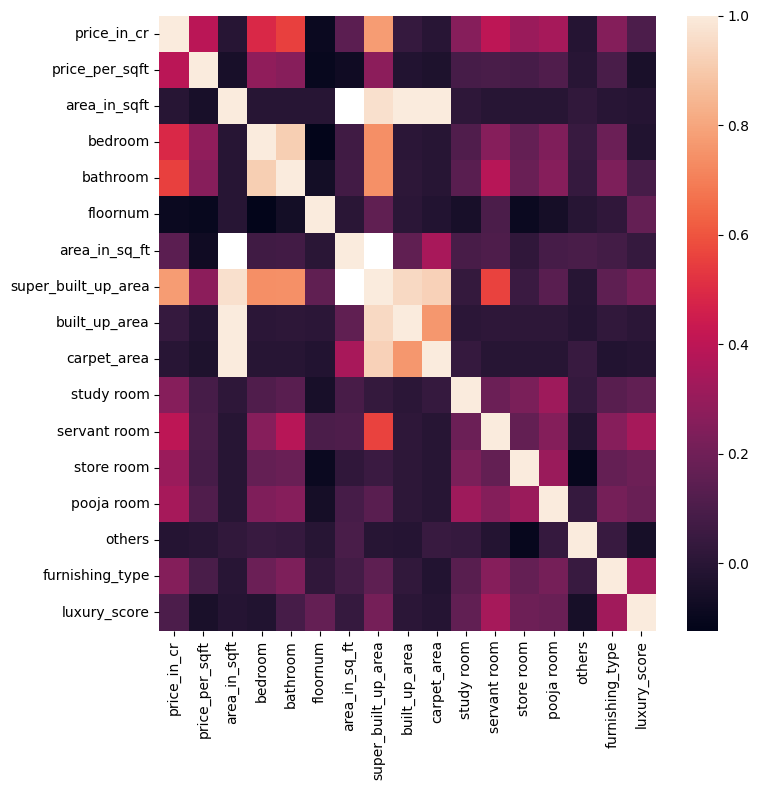

In [293]:
plt.figure(figsize=(8,8))

sns.heatmap(df.corr(numeric_only = True))

plt.tight_layout()
plt.show()

# 28.Price vs Society

In [294]:
temp = pd.pivot_table(df, index = 'society', values = 'price_in_cr', aggfunc = 'median').reset_index()
temp = temp.sort_values(by = 'price_in_cr',ascending = False).round(2).head(25)

fig = px.bar(temp, x= 'society', y = 'price_in_cr', color = 'society', text_auto = True)
fig.update_layout(title = 'Top 25 Expensive Socities with Average Price(In Crores)', yaxis_title = 'Average Price(In Crores)')
fig.show()


In [295]:
temp = pd.pivot_table(df, index = 'society', values = 'price_in_cr', aggfunc = 'median').reset_index()
temp = temp.sort_values(by = 'price_in_cr',ascending = True).round(2).head(25)

fig = px.bar(temp, x= 'society', y = 'price_in_cr', color = 'society', text_auto = True)
fig.update_layout(title = 'Top 25 Budget Friendly Socities with Average Price(In Crores)', yaxis_title = 'Average Price(In Crores)')
fig.show()


# 29.Correlation with price

In [296]:
crosstab = df.corr(numeric_only = True)['price_in_cr'].sort_values(ascending=False)[1:].reset_index()

crosstab

,index,price_in_cr
0,super_built_up_area,0.775513
1,bathroom,0.556176
2,bedroom,0.487014
3,servant room,0.399323
4,price_per_sqft,0.394171
5,pooja room,0.339014
6,store room,0.309396
7,study room,0.256318
8,furnishing_type,0.250323
9,area_in_sq_ft,0.142100
